Leave-one-group-out for the immune response prediction

In [1]:
import warnings
from anndata import ImplicitModificationWarning
warnings.filterwarnings("ignore", category=ImplicitModificationWarning)
warnings.filterwarnings("ignore")

In [2]:
import os,sys
sys.path.append(os.path.realpath(os.path.join(os.getcwd(), '..')))
import numpy as np
import scanpy as sc
import vqtcr as vq

In [3]:
path_base = '/mnt/d/Dataset/vqTCR/10xGenomics/'
path_data = path_base + 'avidity_esm.h5ad'

In [4]:
vq.set_random_seed(2025)
adata = sc.read_h5ad(path_data)
adata = adata[adata.obs['binding_name'].isin(vq.HIGH_COUNT_ANTIGENS)]
adata

View of AnnData object with n_obs × n_vars = 61096 × 5000
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'barcode',

In [5]:
params = vq.get_pred_config(lr=1e-4, latent_dim=64, dropout=0.2, 
                            num_subspace=8, codewords_per_space=64)
params['epoch'] = 20
params['pred']['dim_latent'] = 2*64
params

{'dim_latent': 64,
 'batch_size': 512,
 'lr': 0.0001,
 'dropout': 0.2,
 'epoch': 20,
 'early': 10,
 'dataset': '',
 'save_path': '',
 'direction': 'max',
 'weight_decay': 0.0001,
 'loss_weight': [1.0, 1.0, 1.0, 1.0],
 'gex': {'dim_latent': 64, 'act': 'elu', 'norm': True},
 'tcr': {'esm_type': 'facebook/esm2_t6_8M_UR50D',
  'kmer_kernels': [1, 3, 5, 7],
  'dim_latent': 64,
  'dim_emb': 64,
  'num_heads': 8,
  'forward_expansion': 4,
  'dropout': 0.2,
  'num_encoder': 2,
  'num_decoder': 2,
  'mask_rate': 0.15,
  'beta_only': False,
  'esm_tokens': True},
 'fus': {'dim_latent': 64, 'dropout': 0.2, 'film_reg': 1.0},
 'pty': {'dim_latent': 128,
  'num_subspace': 8,
  'codewords_per_space': 64,
  'eps': 1e-05,
  'init_scale': 1.0,
  'ema_decay': 0.99,
  'commitment_beta': 0.25,
  'use_cosine': True,
  'dead_code_interval': 1000,
  'dead_code_threshold': 0.0001,
  'dead_code_topk': 16,
  'diversity_weight': 0.001},
 'pred': {'dim_latent': 128, 'dropout': 0.2, 'n_labels': 8}}

Leave one donor out(LoDonor) TCR-pMHC binding prediction

pretrain on all donors

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


warmup codebook:   0%|          | 0/10 [00:00<?, ?it/s]

1.472695231437683 3.546380043029785 0.6809260845184326
1.281015157699585 3.487766742706299 0.6655604243278503
1.0998233556747437 3.454538583755493 0.6541275978088379
0.9316264390945435 3.4499969482421875 0.644219696521759
0.7938710451126099 3.439265727996826 0.6345335841178894
0.6816099286079407 3.421353578567505 0.6247962117195129
0.6003409624099731 3.4155921936035156 0.6156996488571167
0.5328773260116577 3.3942391872406006 0.606646716594696
0.48008692264556885 3.3687264919281006 0.5975104570388794
0.43737727403640747 3.3620314598083496 0.5886640548706055
0.4044763445854187 3.3476853370666504 0.5796509981155396
0.3744800090789795 3.3320541381835938 0.5708087086677551
0.35885360836982727 3.3293190002441406 0.5623623728752136
0.34035128355026245 3.3044490814208984 0.5536012053489685
0.3307301998138428 3.2949748039245605 0.54509037733078
0.3221978545188904 3.269589424133301 0.5364232063293457
0.3108955919742584 3.2569968700408936 0.5279636979103088
0.300750732421875 3.24613881111145 0.51

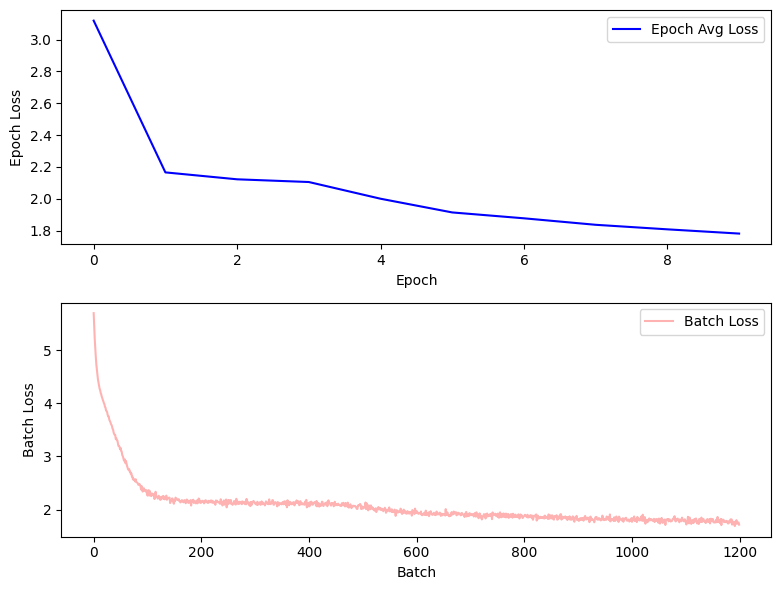

Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 16D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.01 s): objective=9211.63 imbalance=1.144 nsplit=0       
Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 16D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.00 s): objective=9465.4 imbalance=1.158 nsplit=0        
Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 16D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.00 s): objective=9467.19 imbalance=1.175 nsplit=0       
Sampling a subset of 16384 / 61096 for training
Clustering 16384 points in 16D to 64 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.00 s
  Iteration 19 (0.01 s, search 0.00 s): objective=8342.74 imbalance=1.144 nsplit=0       
Sampling a subset of 16384 / 61096 for train

Pre-Training:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [57.55791091918945, 55.157718658447266, 56.88853454589844, 56.47048568725586, 59.09452438354492, 56.78733444213867, 56.859622955322266, 56.82417297363281] dead_rate_per_codebook[0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.11769864708185196 1.6825230121612549 0.008334987796843052 0.0007673847721889615
perplexity_per_codebook [56.643455505371094, 55.46038055419922, 54.772178649902344, 56.69944763183594, 55.12130355834961, 57.63008117675781, 53.724185943603516, 54.435237884521484] dead_rate_per_codebook[0.0, 0.015625, 0.03125, 0.015625, 0.0, 0.0, 0.015625, 0.0]
0.16365574300289154 2.327613592147827 0.009199060499668121 0.0007604725542478263
perplexity_per_codebook [57.98716354370117, 51.47036361694336, 55.39525604248047, 55.93407440185547, 15.910325050354004, 14.054061889648438, 12.766103744506836, 6.317477226257324] dead_rate_per_codebook[0.0, 0.0, 0.0, 0.0, 0.3125, 0.34375, 0.40625, 0.421875]
0.15574848651885986 2.303894519805908 0.01491495966911316 0.00080016

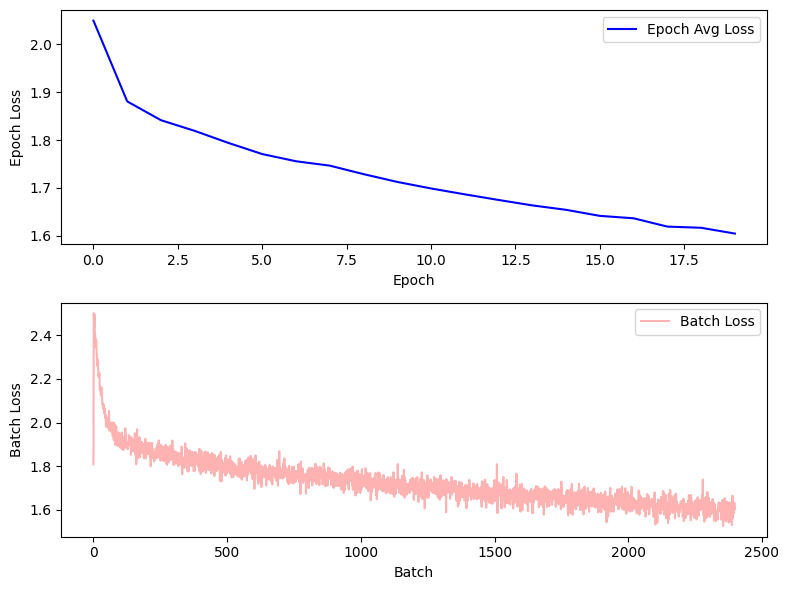

In [6]:
vqtcr = vq.vqTCR(params, adata, labels='binding_name')
vqtcr.pretrain(col_name='donor', 
               set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'],
               sample_mode='clonotype', 
               shuffle=False,
               labels=None,
               visual=True)

perplexity_per_codebook [19.78894805908203, 20.980958938598633, 21.383298873901367, 17.63253402709961, 41.14590835571289, 36.536434173583984, 38.917747497558594, 41.27555465698242] dead_rate_per_codebook[0.125, 0.1875, 0.140625, 0.1875, 0.0625, 0.09375, 0.078125, 0.015625]
perplexity_per_codebook [17.384510040283203, 18.262250900268555, 19.9464054107666, 15.883926391601562, 37.59493637084961, 29.188701629638672, 39.807289123535156, 35.60112380981445] dead_rate_per_codebook[0.234375, 0.234375, 0.171875, 0.1875, 0.046875, 0.1875, 0.078125, 0.078125]
perplexity_per_codebook [18.300127029418945, 19.343307495117188, 18.962692260742188, 15.878545761108398, 36.37723159790039, 31.023155212402344, 38.513893127441406, 37.64727783203125] dead_rate_per_codebook[0.140625, 0.15625, 0.21875, 0.171875, 0.109375, 0.1875, 0.09375, 0.09375]
perplexity_per_codebook [21.10050392150879, 21.350547790527344, 21.116914749145508, 18.126039505004883, 37.26792526245117, 31.093725204467773, 39.41849136352539, 36.3

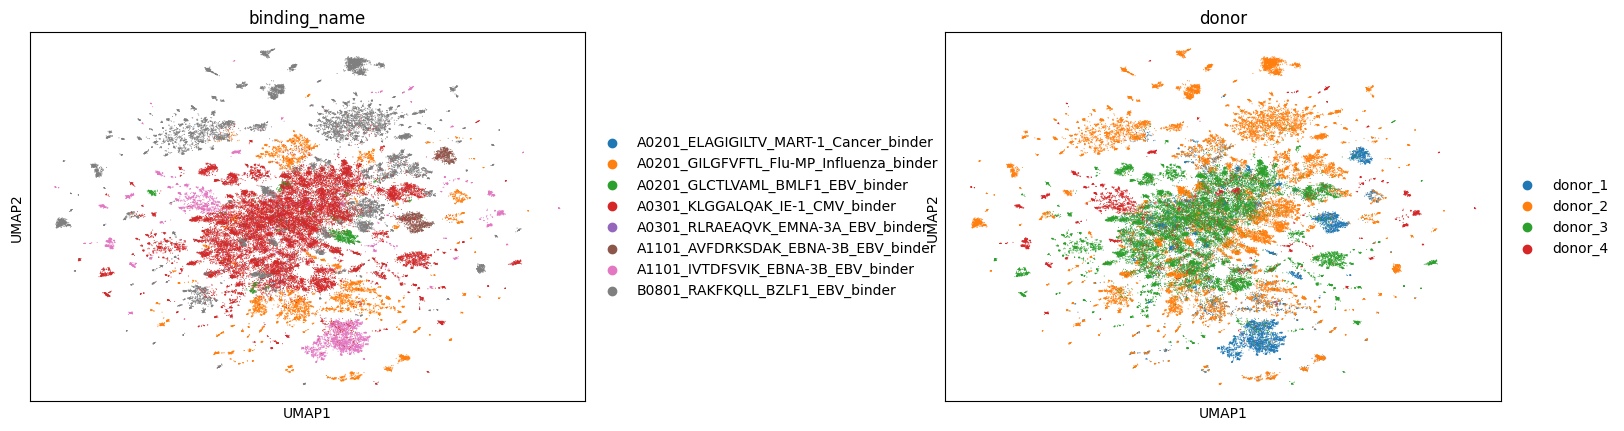

In [7]:
adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
# tcr latent space
sc.pp.neighbors(adata, use_rep='htcell')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

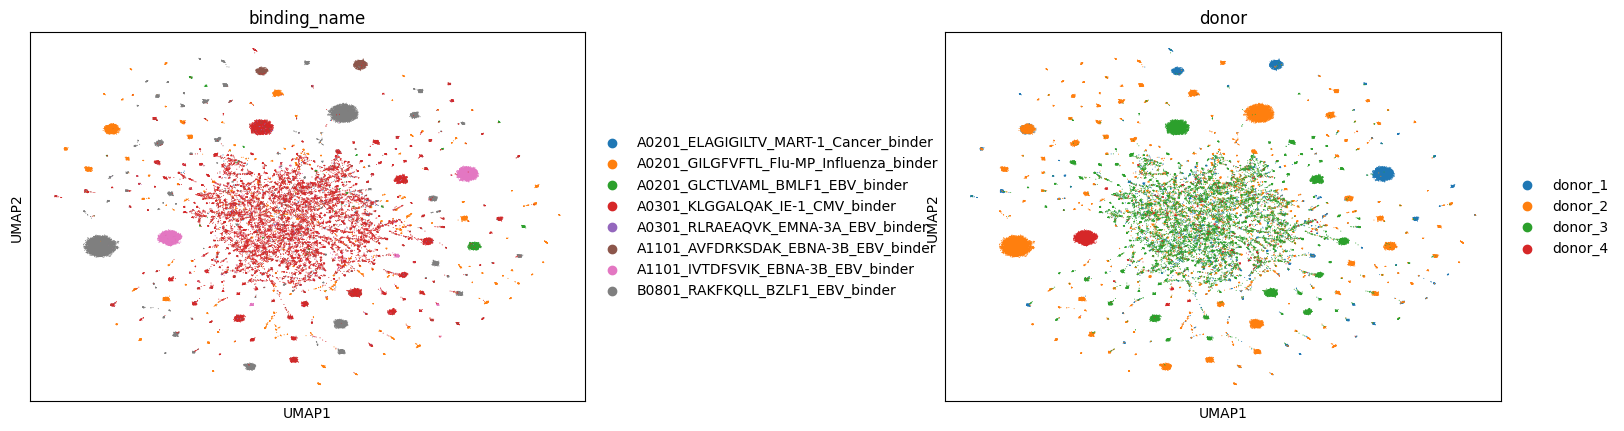

In [8]:
# tcr latent space
sc.pp.neighbors(adata, use_rep='htcr')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

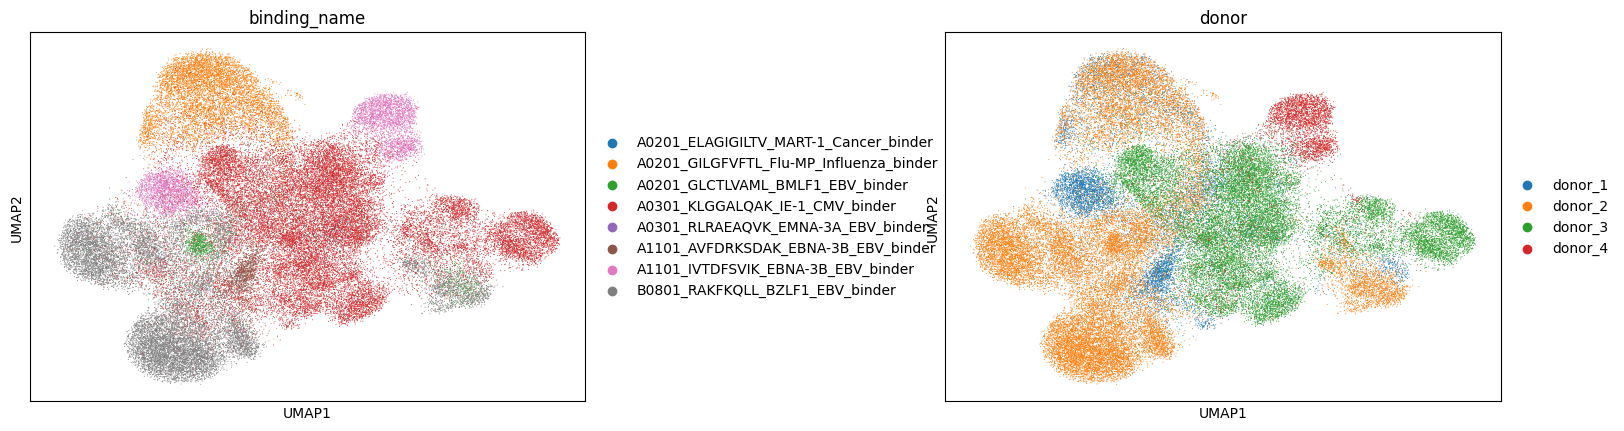

In [9]:
# gex residual latent space
sc.pp.neighbors(adata, use_rep='hgex')
sc.tl.umap(adata)
sc.pl.umap(adata, color=['binding_name', 'donor'], wspace=0.5)

prediction training on remianing patients and test on leave-out patient

In [10]:
# test_score = vqtcr.compute_metrics(metrics='knn_prediction', eval_set='test')
record = {}
adata = vqtcr.get_latent(adata,col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
adata_train = adata[adata.obs['set'].isin(['train', 'valid'])]
adata_valid = adata[adata.obs['set']=='test']

knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                            adata_train.obs['binding_name'], 
                            adata_valid.obs['binding_name'])
record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
record['knn_prediction']

perplexity_per_codebook [19.78894805908203, 20.980958938598633, 21.383298873901367, 17.63253402709961, 41.14590835571289, 36.536434173583984, 38.917747497558594, 41.27555465698242] dead_rate_per_codebook[0.125, 0.1875, 0.140625, 0.1875, 0.0625, 0.09375, 0.078125, 0.015625]
perplexity_per_codebook [17.384510040283203, 18.262250900268555, 19.9464054107666, 15.883926391601562, 37.59493637084961, 29.188701629638672, 39.807289123535156, 35.60112380981445] dead_rate_per_codebook[0.234375, 0.234375, 0.171875, 0.1875, 0.046875, 0.1875, 0.078125, 0.078125]
perplexity_per_codebook [18.300127029418945, 19.343307495117188, 18.962692260742188, 15.878545761108398, 36.37723159790039, 31.023155212402344, 38.513893127441406, 37.64727783203125] dead_rate_per_codebook[0.140625, 0.15625, 0.21875, 0.171875, 0.109375, 0.1875, 0.09375, 0.09375]
perplexity_per_codebook [21.10050392150879, 21.350547790527344, 21.116914749145508, 18.126039505004883, 37.26792526245117, 31.093725204467773, 39.41849136352539, 36.3

0.4681867542708763

In [11]:
adata = vq.split_adata(adata, split_col='clonotype', random_seed=2025)
record = {}
adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
adata_train = adata[adata.obs['set']=='train']
adata_valid = adata[adata.obs['set']=='test']

knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                            adata_train.obs['binding_name'], 
                            adata_valid.obs['binding_name'])
record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
record['knn_prediction']

perplexity_per_codebook [19.78894805908203, 20.980958938598633, 21.383298873901367, 17.63253402709961, 41.14590835571289, 36.536434173583984, 38.917747497558594, 41.27555465698242] dead_rate_per_codebook[0.125, 0.1875, 0.140625, 0.1875, 0.0625, 0.09375, 0.078125, 0.015625]
perplexity_per_codebook [17.384510040283203, 18.262250900268555, 19.9464054107666, 15.883926391601562, 37.59493637084961, 29.188701629638672, 39.807289123535156, 35.60112380981445] dead_rate_per_codebook[0.234375, 0.234375, 0.171875, 0.1875, 0.046875, 0.1875, 0.078125, 0.078125]
perplexity_per_codebook [18.300127029418945, 19.343307495117188, 18.962692260742188, 15.878545761108398, 36.37723159790039, 31.023155212402344, 38.513893127441406, 37.64727783203125] dead_rate_per_codebook[0.140625, 0.15625, 0.21875, 0.171875, 0.109375, 0.1875, 0.09375, 0.09375]
perplexity_per_codebook [21.10050392150879, 21.350547790527344, 21.116914749145508, 18.126039505004883, 37.26792526245117, 31.093725204467773, 39.41849136352539, 36.3

0.8065050984668038

In [12]:
from sklearn.model_selection import LeaveOneGroupOut, LeavePGroupsOut
logo = LeaveOneGroupOut()
all_test_metrics = []
donor_ids = adata.obs.donor.to_numpy()
import numpy as np
for train_valid_idx, test_idx in logo.split(X=adata.X, groups=donor_ids):
    test_donor = donor_ids[test_idx][0]
    print(f"\n=== test on {test_donor} ===")
    adata.obs.loc[adata.obs.index[train_valid_idx], 'set']='train'
    adata.obs.loc[adata.obs.index[test_idx], 'set'] = 'test'
    record = {}
    adata = vqtcr.get_latent(adata, col_name='donor', set_name=['donor_1', 'donor_2', 'donor_3', 'donor_4'])
    adata_train = adata[adata.obs['set']=='train']
    adata_valid = adata[adata.obs['set']=='test']

    knn_scores = vq.get_knn_cls(adata_train.obsm['htcr'], adata_valid.obsm['htcr'],
                                adata_train.obs['binding_name'], 
                                adata_valid.obs['binding_name'])
    record['knn_prediction'] = knn_scores['weighted avg']['f1-score']
    print(record['knn_prediction'])


=== test on donor_1 ===
perplexity_per_codebook [19.78894805908203, 20.980958938598633, 21.383298873901367, 17.63253402709961, 41.14590835571289, 36.536434173583984, 38.917747497558594, 41.27555465698242] dead_rate_per_codebook[0.125, 0.1875, 0.140625, 0.1875, 0.0625, 0.09375, 0.078125, 0.015625]
perplexity_per_codebook [17.384510040283203, 18.262250900268555, 19.9464054107666, 15.883926391601562, 37.59493637084961, 29.188701629638672, 39.807289123535156, 35.60112380981445] dead_rate_per_codebook[0.234375, 0.234375, 0.171875, 0.1875, 0.046875, 0.1875, 0.078125, 0.078125]
perplexity_per_codebook [18.300127029418945, 19.343307495117188, 18.962692260742188, 15.878545761108398, 36.37723159790039, 31.023155212402344, 38.513893127441406, 37.64727783203125] dead_rate_per_codebook[0.140625, 0.15625, 0.21875, 0.171875, 0.109375, 0.1875, 0.09375, 0.09375]
perplexity_per_codebook [21.10050392150879, 21.350547790527344, 21.116914749145508, 18.126039505004883, 37.26792526245117, 31.093725204467773

In [13]:
all_test_metrics = []
for train_valid_idx, test_idx in logo.split(X=adata.X, groups=donor_ids):
    test_donor = donor_ids[test_idx][0]
    print(f"\n=== test on {test_donor} ===")
    # split train-valid dataset
    adata_train_val = adata[train_valid_idx]
    train, val = vq.split_dataset(adata_train_val, split_ratio=0.25, 
                                  split_col='clonotype', random_seed=2025)
    adata.obs['set'] = None
    adata.obs.loc[train.obs.index, 'set'] = 'train'
    adata.obs.loc[val.obs.index, 'set'] = 'valid'
    adata.obs.loc[adata.obs.index[test_idx], 'set'] = 'test'
    trainloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['train'],
                                     sample_mode='clonotype',
                                     shuffle=False, 
                                     labels='binding_name')
    validloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['valid'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    testloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['test'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    best_score = vqtcr.predict_train(trainloader, validloader)
    print(f'best score in validation: {best_score}')
    
    test_metrics = vqtcr.predict_test(testloader)
    all_test_metrics.append(test_metrics)
    
metric = 'weighted'
print("\n" + "="*60)
print("LOGO Results:")
for i, metrics in enumerate(all_test_metrics):
        print(f"Donor {np.unique(donor_ids)[i]}: "
              f"f1: {metrics[f'f1_{metric}']:.3f}, "
              f"AUC-ROC: {metrics[f'auc_roc_{metric}']:.3f}, "
              f"AUC-PR: {metrics[f'auc_pr_{metric}']:.3f}")
    
mean_f1 = np.nanmean([m[f'f1_{metric}'] for m in all_test_metrics])
mean_auc_roc = np.nanmean([m[f'auc_roc_{metric}'] for m in all_test_metrics])
mean_auc_pr = np.nanmean([m[f'auc_pr_{metric}'] for m in all_test_metrics])

print(f"\n Average: "
        f"fa: {mean_f1:.3f} ± {np.nanstd([m[f'f1_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-ROC: {mean_auc_roc:.3f} ± {np.nanstd([m[f'auc_roc_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-PR: {mean_auc_pr:.3f} ± {np.nanstd([m[f'auc_pr_{metric}'] for m in all_test_metrics]):.3f}")


=== test on donor_1 ===


Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [55.20760726928711, 54.61614227294922, 53.842105865478516, 55.522796630859375, 53.14225769042969, 53.29350662231445, 56.344871520996094, 54.077613830566406] dead_rate_per_codebook[0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.0]
perplexity_per_codebook [52.26823806762695, 55.64079284667969, 54.61918640136719, 55.603660583496094, 54.57963943481445, 51.335506439208984, 55.486488342285156, 55.32105255126953] dead_rate_per_codebook[0.03125, 0.0, 0.0, 0.015625, 0.0, 0.03125, 0.015625, 0.0]
perplexity_per_codebook [55.26610565185547, 57.53974533081055, 54.946346282958984, 56.85884094238281, 51.1126708984375, 54.03721237182617, 55.333717346191406, 53.141876220703125] dead_rate_per_codebook[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015625]
perplexity_per_codebook [52.01982498168945, 53.948116302490234, 52.81758117675781, 52.927982330322266, 51.54835891723633, 53.995304107666016, 54.74998474121094, 55.34846878051758] dead_rate_per_codebook[0.0, 0.0, 0.046875, 0.046

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [53.53129959106445, 53.15030288696289, 53.176273345947266, 55.39617919921875, 53.355491638183594, 50.720096588134766, 52.06655502319336, 54.10877227783203] dead_rate_per_codebook[0.03125, 0.03125, 0.015625, 0.015625, 0.0, 0.015625, 0.03125, 0.015625]
perplexity_per_codebook [55.59658432006836, 54.73385238647461, 53.582862854003906, 57.15668869018555, 49.6002311706543, 50.88316345214844, 50.65244674682617, 51.12868881225586] dead_rate_per_codebook[0.0, 0.0, 0.03125, 0.0, 0.015625, 0.015625, 0.0, 0.015625]
perplexity_per_codebook [54.74272918701172, 56.11565399169922, 53.344730377197266, 56.692745208740234, 52.689666748046875, 51.75666809082031, 50.21126937866211, 51.37047576904297] dead_rate_per_codebook[0.015625, 0.0, 0.03125, 0.0, 0.0, 0.0, 0.03125, 0.015625]
perplexity_per_codebook [52.707191467285156, 53.917076110839844, 50.22897720336914, 52.7958984375, 54.09657287597656, 52.22480392456055, 52.14434051513672, 51.70210647583008] dead_rate_per_codebook[0.01562

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.49038314819336, 54.842533111572266, 52.41012191772461, 50.98452377319336, 41.8114013671875, 41.31953811645508, 41.336402893066406, 40.16024398803711] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.0, 0.0, 0.046875, 0.0625, 0.046875]
perplexity_per_codebook [50.128746032714844, 52.555599212646484, 50.828102111816406, 50.13446044921875, 46.60837173461914, 44.596763610839844, 40.2739143371582, 42.53904724121094] dead_rate_per_codebook[0.046875, 0.0, 0.015625, 0.0625, 0.0625, 0.03125, 0.09375, 0.03125]
perplexity_per_codebook [52.47824478149414, 50.27107620239258, 50.24089431762695, 50.23772430419922, 44.473392486572266, 44.5711669921875, 41.56756591796875, 40.686004638671875] dead_rate_per_codebook[0.03125, 0.0, 0.03125, 0.0, 0.046875, 0.078125, 0.0625, 0.0625]
perplexity_per_codebook [52.6623420715332, 54.25782775878906, 50.756980895996094, 53.084564208984375, 46.2906379699707, 43.89622497558594, 40.830806732177734, 41.61433792114258] dead_rate_per_codebook[0.0,

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [56.420955657958984, 56.75587463378906, 52.17799377441406, 57.72408676147461, 53.458194732666016, 56.20951843261719, 56.11920928955078, 53.022796630859375] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625]
perplexity_per_codebook [54.992164611816406, 54.1068000793457, 53.933250427246094, 56.47355651855469, 51.299293518066406, 53.69235610961914, 56.30453109741211, 53.37348175048828] dead_rate_per_codebook[0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
perplexity_per_codebook [56.10222244262695, 55.998443603515625, 55.58430862426758, 56.385215759277344, 54.31381607055664, 54.50994873046875, 56.83506774902344, 54.51953125] dead_rate_per_codebook[0.015625, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0]
perplexity_per_codebook [53.69668197631836, 56.897216796875, 53.612789154052734, 57.69425582885742, 53.444278717041016, 56.9583740234375, 54.354286193847656, 54.105125427246094] dead_rate_per_codebook[0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.0

In [14]:
all_test_metrics = []
for i in range(5):
    adata = vq.split_adata(adata, split_col='clonotype', random_seed=i)
    trainloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['train'],
                                     sample_mode='clonotype',
                                     shuffle=False, 
                                     labels='binding_name')
    validloader = vq.get_dataloader(adata=adata, 
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['valid'],
                                     sample_mode=None,
                                     shuffle=False, 
                                     labels='binding_name')
    testloader = vq.get_dataloader(adata=adata,
                                     batch_size=params['batch_size'],
                                     col_name='set',
                                     set_name=['test'],
                                     sample_mode=None,
                                     shuffle=False,
                                     labels='binding_name')
    best_score = vqtcr.predict_train(trainloader, validloader)
    print(f'best score in validation: {best_score}')
    
    test_metrics = vqtcr.predict_test(testloader)
    all_test_metrics.append(test_metrics)

print("\n" + "="*60)
print("LOGO Results:")
for i, metrics in enumerate(all_test_metrics):
        print(f"splite {i}: "
              f"F1: {metrics[f'f1_{metric}']:.3f}, "
              f"AUC-ROC: {metrics[f'auc_roc_{metric}']:.3f}, "
              f"AUC-PR: {metrics[f'auc_pr_{metric}']:.3f}")
    
mean_f1 = np.nanmean([m[f'f1_{metric}'] for m in all_test_metrics])
mean_auc_roc = np.nanmean([m[f'auc_roc_{metric}'] for m in all_test_metrics])
mean_auc_pr = np.nanmean([m[f'auc_pr_{metric}'] for m in all_test_metrics])

print(f"\n Average: "
        f"F1: {mean_f1:.3f} ± {np.nanstd([m[f'f1_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-ROC: {mean_auc_roc:.3f} ± {np.nanstd([m[f'auc_roc_{metric}'] for m in all_test_metrics]):.3f}, "
        f"AUC-PR: {mean_auc_pr:.3f} ± {np.nanstd([m[f'auc_pr_{metric}'] for m in all_test_metrics]):.3f}")

    

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [55.37467956542969, 54.60986328125, 54.062713623046875, 54.707550048828125, 52.83465576171875, 55.507259368896484, 57.95965576171875, 53.726531982421875] dead_rate_per_codebook[0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0]
perplexity_per_codebook [54.121726989746094, 56.12943649291992, 56.11712646484375, 55.14419937133789, 53.596229553222656, 56.16025161743164, 55.249267578125, 54.31209182739258] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.015625, 0.015625, 0.0, 0.0, 0.015625]
perplexity_per_codebook [55.969879150390625, 55.57487487792969, 54.035675048828125, 55.25849151611328, 53.00688552856445, 55.4735221862793, 57.243858337402344, 52.64359664916992] dead_rate_per_codebook[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03125]
perplexity_per_codebook [54.72654342651367, 54.61402893066406, 53.829837799072266, 54.66720962524414, 55.557518005371094, 56.172969818115234, 58.59171676635742, 56.12531280517578] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.0, 

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [53.532283782958984, 55.8311653137207, 53.711421966552734, 55.78252029418945, 53.58314514160156, 53.19093322753906, 54.6115837097168, 52.514278411865234] dead_rate_per_codebook[0.03125, 0.0, 0.015625, 0.015625, 0.0, 0.03125, 0.03125, 0.0]
perplexity_per_codebook [52.73871994018555, 55.942771911621094, 52.7002067565918, 54.33148193359375, 52.18757629394531, 54.96350860595703, 56.75189971923828, 51.28865051269531] dead_rate_per_codebook[0.015625, 0.0, 0.015625, 0.03125, 0.0, 0.015625, 0.0, 0.03125]
perplexity_per_codebook [54.24491500854492, 56.47269058227539, 55.15019607543945, 54.668434143066406, 54.21474075317383, 55.5052490234375, 55.564144134521484, 55.058807373046875] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.03125, 0.0, 0.015625, 0.0, 0.0]
perplexity_per_codebook [55.8111457824707, 57.817832946777344, 53.50468444824219, 56.16536331176758, 54.99116516113281, 55.74781799316406, 56.55596160888672, 54.24706268310547] dead_rate_per_codebook[0.0, 0.0, 0.03125,

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [52.207496643066406, 55.37114334106445, 54.70734405517578, 55.82270050048828, 51.958343505859375, 53.4462890625, 56.06141662597656, 53.86641311645508] dead_rate_per_codebook[0.046875, 0.0, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.015625]
perplexity_per_codebook [52.59831619262695, 56.53881072998047, 53.46173858642578, 55.91343307495117, 53.09633255004883, 57.33367919921875, 52.944095611572266, 54.52452087402344] dead_rate_per_codebook[0.03125, 0.0, 0.0, 0.0, 0.015625, 0.0, 0.015625, 0.015625]
perplexity_per_codebook [55.053871154785156, 55.38054656982422, 56.324405670166016, 56.309364318847656, 50.882667541503906, 54.30617904663086, 56.79085159301758, 52.827388763427734] dead_rate_per_codebook[0.0, 0.0, 0.0, 0.0, 0.015625, 0.03125, 0.0, 0.0]
perplexity_per_codebook [53.59589767456055, 57.59299850463867, 56.224849700927734, 55.245635986328125, 53.43626403808594, 54.15217590332031, 57.10689163208008, 52.74982452392578] dead_rate_per_codebook[0.015625, 0.0, 0.0, 0.015625, 0

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [56.084171295166016, 56.33616638183594, 54.45243453979492, 55.864131927490234, 52.25817108154297, 54.18220138549805, 53.62925338745117, 51.08964538574219] dead_rate_per_codebook[0.0, 0.015625, 0.0, 0.015625, 0.0, 0.0, 0.015625, 0.03125]
perplexity_per_codebook [56.28488540649414, 56.73482894897461, 54.819156646728516, 56.110809326171875, 50.85542297363281, 54.13198471069336, 55.26133728027344, 52.55587387084961] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0]
perplexity_per_codebook [53.48114013671875, 53.77810287475586, 53.96049499511719, 55.07122802734375, 52.19297409057617, 56.418941497802734, 53.280208587646484, 51.32779312133789] dead_rate_per_codebook[0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
perplexity_per_codebook [53.81687545776367, 57.16312026977539, 54.890045166015625, 55.706336975097656, 54.67646408081055, 55.97810363769531, 58.1220588684082, 53.21661376953125] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.01

Training prediction head:   0%|          | 0/20 [00:00<?, ?it/s]

perplexity_per_codebook [54.1015625, 55.302459716796875, 52.9849853515625, 54.997039794921875, 55.095211029052734, 54.657901763916016, 54.722843170166016, 54.82543182373047] dead_rate_per_codebook[0.0, 0.015625, 0.015625, 0.0, 0.0, 0.015625, 0.015625, 0.0]
perplexity_per_codebook [54.845096588134766, 56.556121826171875, 54.131046295166016, 55.76791763305664, 52.02682113647461, 53.37229537963867, 54.204505920410156, 52.53545379638672] dead_rate_per_codebook[0.0, 0.0, 0.0, 0.03125, 0.0, 0.03125, 0.015625, 0.015625]
perplexity_per_codebook [52.88762664794922, 56.87594985961914, 54.10419464111328, 54.467323303222656, 51.86537170410156, 56.99978256225586, 55.02387237548828, 53.162960052490234] dead_rate_per_codebook[0.0, 0.0, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.015625]
perplexity_per_codebook [54.021236419677734, 54.4006233215332, 54.5600471496582, 54.77375030517578, 54.98291015625, 53.28816223144531, 56.608089447021484, 52.71532440185547] dead_rate_per_codebook[0.0, 0.03125, 0.0, 0.015625